# Análisis Exploratorio de Datos

A continuación realizaremos el análisis exploratorio del dataset escogido para la creación del modelo, donde analizaremos las variables, cantidad de datos, posibles nulos, distribución de la variable objetivo y la correlación entre todas las variables.  

In [ ]:
# Importamos librerias necesarias para realizar el analisis. 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuramos las opciones de pandas y seaborn para mejorar la visualización de datos.
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid", palette="muted", color_codes=True)

# Cargamos el dataset de diabetes y mostramos su tamaño.
df = pd.read_csv('../data/raw/diabetes_012_health_indicators_BRFSS2015.csv')
print('tamaño del dataset:', df.shape,'\n')

tamaño del dataset: (253680, 22) 



In [ ]:
# Mostramos las primeras filas del dataset para tener una idea de su contenido y estructura.
print(df.head(), '\n')

   Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0           0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1           0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2           0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3           0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4           0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  HvyAlcoholConsump  \
0                   0.0           0.0     0.0      1.0                0.0   
1                   0.0           1.0     0.0      0.0                0.0   
2                   0.0           0.0     1.0      0.0                0.0   
3                   0.0           1.0     1.0      1.0                0.0   
4                   0.0           1.0     1.0      1.0                0.0   

   AnyHealthcare  NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex  \
0            1.0          0.0      5.0 

In [ ]:
# Mostramos informacion general del dataset como tipo de datos y valores nulos
print(df.info(), '\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [ ]:
# Mostramos estadisticas descriptivas del dataset para entender mejor la distribución de los datos.
print(df.describe(), '\n')

        Diabetes_012         HighBP       HighChol      CholCheck  \
count  253680.000000  253680.000000  253680.000000  253680.000000   
mean        0.296921       0.429001       0.424121       0.962670   
std         0.698160       0.494934       0.494210       0.189571   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       1.000000   
50%         0.000000       0.000000       0.000000       1.000000   
75%         0.000000       1.000000       1.000000       1.000000   
max         2.000000       1.000000       1.000000       1.000000   

                 BMI         Smoker         Stroke  HeartDiseaseorAttack  \
count  253680.000000  253680.000000  253680.000000         253680.000000   
mean       28.382364       0.443169       0.040571              0.094186   
std         6.608694       0.496761       0.197294              0.292087   
min        12.000000       0.000000       0.000000              0.000000  

In [ ]:
# Verificamos la presencia de valores nulos en el dataset.
nulls = df.isnull().sum()
print('Valores nulos por columna:\n', nulls[nulls > 0])

Valores nulos por columna:
 Series([], dtype: int64)


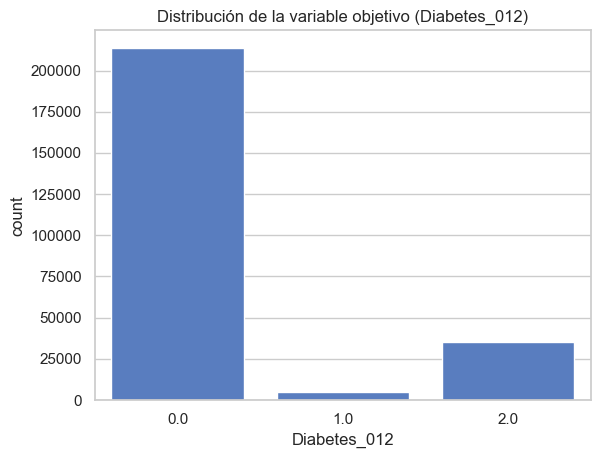

Número de registros sin diabetes:  213703 , Porcentaje: 84.24116997792494 %
Número de registros con prediabetes: 4631 , Porcentaje: 1.8255282245348472 %
Número de registros con diabetes: 35346 , Porcentaje: 13.933301797540206 %


In [ ]:
# Analizamos la distribucion de la variable objetivo 'diabetes_012'.
sns.countplot(x='Diabetes_012', data=df)
plt.title('Distribución de la variable objetivo (Diabetes_012)')
plt.show()

# Calculamos el número y porcentaje de registros en cada categoría de la variable objetivo.
sinDiabetes = df[df['Diabetes_012'] == 0]
preDiabetes = df[df['Diabetes_012'] == 1]
conDiabetes2 = df[df['Diabetes_012'] == 2]

print('Número de registros sin diabetes: ', sinDiabetes.shape[0] ,',', 'Porcentaje:', sinDiabetes.shape[0]/df.shape[0] * 100 , '%')
print('Número de registros con prediabetes:', preDiabetes.shape[0], ',', 'Porcentaje:', preDiabetes.shape[0]/df.shape[0] * 100, '%' )
print('Número de registros con diabetes:', conDiabetes2.shape[0], ',' , 'Porcentaje:', conDiabetes2.shape[0]/df.shape[0] * 100, '%')

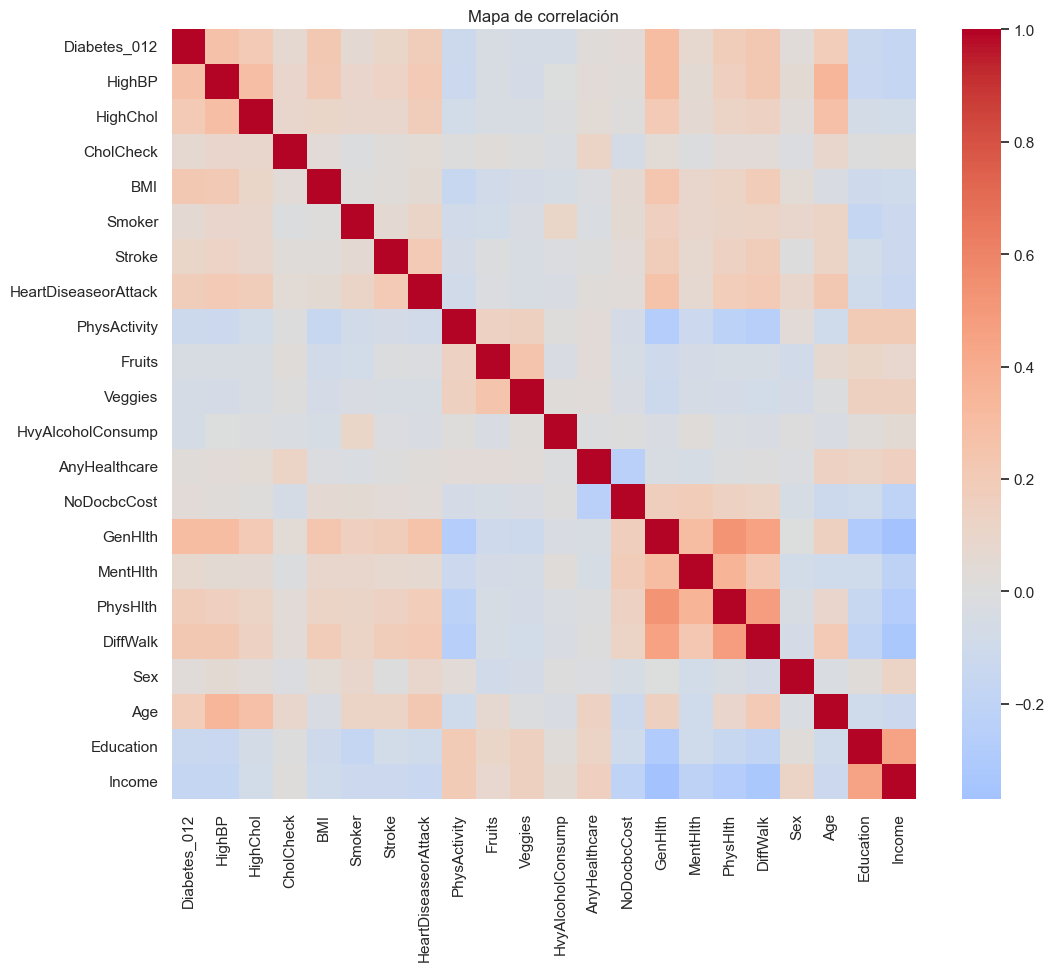

In [ ]:
# Analizamos la correlación entre las variables numéricas del dataset.
corr = df.corr(numeric_only=True)
plt.figure(figsize=(12,10))
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title('Mapa de correlación')
plt.show()

In [ ]:
# Calculamos el numero de valores unicos por columna.
print("\nValores únicos por columna:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} valores únicos")


Valores únicos por columna:
Diabetes_012: 3 valores únicos
HighBP: 2 valores únicos
HighChol: 2 valores únicos
CholCheck: 2 valores únicos
BMI: 84 valores únicos
Smoker: 2 valores únicos
Stroke: 2 valores únicos
HeartDiseaseorAttack: 2 valores únicos
PhysActivity: 2 valores únicos
Fruits: 2 valores únicos
Veggies: 2 valores únicos
HvyAlcoholConsump: 2 valores únicos
AnyHealthcare: 2 valores únicos
NoDocbcCost: 2 valores únicos
GenHlth: 5 valores únicos
MentHlth: 31 valores únicos
PhysHlth: 31 valores únicos
DiffWalk: 2 valores únicos
Sex: 2 valores únicos
Age: 13 valores únicos
Education: 6 valores únicos
Income: 8 valores únicos
